-----

# Problem Statement

* Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

* They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
* At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


--------------------------------

* This project is based on a analytics vidya hackathon.

## Target 
* They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

----

## Step 1- Importing the Data

In [1]:
setwd("C:/Users/KOMAL/Desktop/data/HR analytics")

In [2]:
# Import datasets
train <- read.csv("train.csv", stringsAsFactors = F)
test <- read.csv("test.csv", stringsAsFactors = F)

In [3]:
# Getting a feel of the data at hand
head(train)

employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3,7,0,0,85,0


In [4]:
tail(train)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
54803,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1,2,0,0,49,0
54804,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3,17,0,0,78,0
54805,74592,Operations,region_27,Master's & above,f,other,1,37,2,6,0,0,56,0
54806,13918,Analytics,region_1,Bachelor's,m,other,1,27,5,3,1,0,79,0
54807,13614,Sales & Marketing,region_9,,m,sourcing,1,29,1,2,0,0,45,0
54808,51526,HR,region_22,Bachelor's,m,other,1,27,1,5,0,0,49,0


In [5]:
str(train)

'data.frame':	54808 obs. of  14 variables:
 $ employee_id         : int  65438 65141 7513 2542 48945 58896 20379 16290 73202 28911 ...
 $ department          : chr  "Sales & Marketing" "Operations" "Sales & Marketing" "Sales & Marketing" ...
 $ region              : chr  "region_7" "region_22" "region_19" "region_23" ...
 $ education           : chr  "Master's & above" "Bachelor's" "Bachelor's" "Bachelor's" ...
 $ gender              : chr  "f" "m" "m" "m" ...
 $ recruitment_channel : chr  "sourcing" "other" "sourcing" "other" ...
 $ no_of_trainings     : int  1 1 1 2 1 2 1 1 1 1 ...
 $ age                 : int  35 30 34 39 45 31 31 33 28 32 ...
 $ previous_year_rating: int  5 5 3 1 3 3 3 3 4 5 ...
 $ length_of_service   : int  8 4 7 10 2 7 5 6 5 5 ...
 $ KPIs_met..80.       : int  1 0 0 0 0 0 0 0 0 1 ...
 $ awards_won.         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : int  49 60 50 50 73 85 59 63 83 54 ...
 $ is_promoted         : int  0 0 0 0 0 0 0 0 0 0 ...


## Step 2 - Data Cleaning

In [6]:
require(dplyr)

Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
# Combine datasets, so that cleaning can be done on both the data
master <- bind_rows(train, test)

In [8]:
# Converting all character values to upper case to Avoid case mismatch possibility
master <- mutate_if(master, is.character, toupper)

In [9]:
head(master)

employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
65438,SALES & MARKETING,REGION_7,MASTER'S & ABOVE,F,SOURCING,1,35,5,8,1,0,49,0
65141,OPERATIONS,REGION_22,BACHELOR'S,M,OTHER,1,30,5,4,0,0,60,0
7513,SALES & MARKETING,REGION_19,BACHELOR'S,M,SOURCING,1,34,3,7,0,0,50,0
2542,SALES & MARKETING,REGION_23,BACHELOR'S,M,OTHER,2,39,1,10,0,0,50,0
48945,TECHNOLOGY,REGION_26,BACHELOR'S,M,OTHER,1,45,3,2,0,0,73,0
58896,ANALYTICS,REGION_2,BACHELOR'S,M,SOURCING,2,31,3,7,0,0,85,0


In [10]:
# Checking blanks
colSums(master == "", na.rm = T)

employee_id           department               region 
                   0                    0                    0 
           education               gender  recruitment_channel 
                3443                    0                    0 
     no_of_trainings                  age previous_year_rating 
                   0                    0                    0 
   length_of_service        KPIs_met..80.          awards_won. 
                   0                    0                    0 
  avg_training_score          is_promoted 
                   0                    0


                       BACHELOR'S  BELOW SECONDARY MASTER'S & ABOVE 
            3443            52247             1179            21429 

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

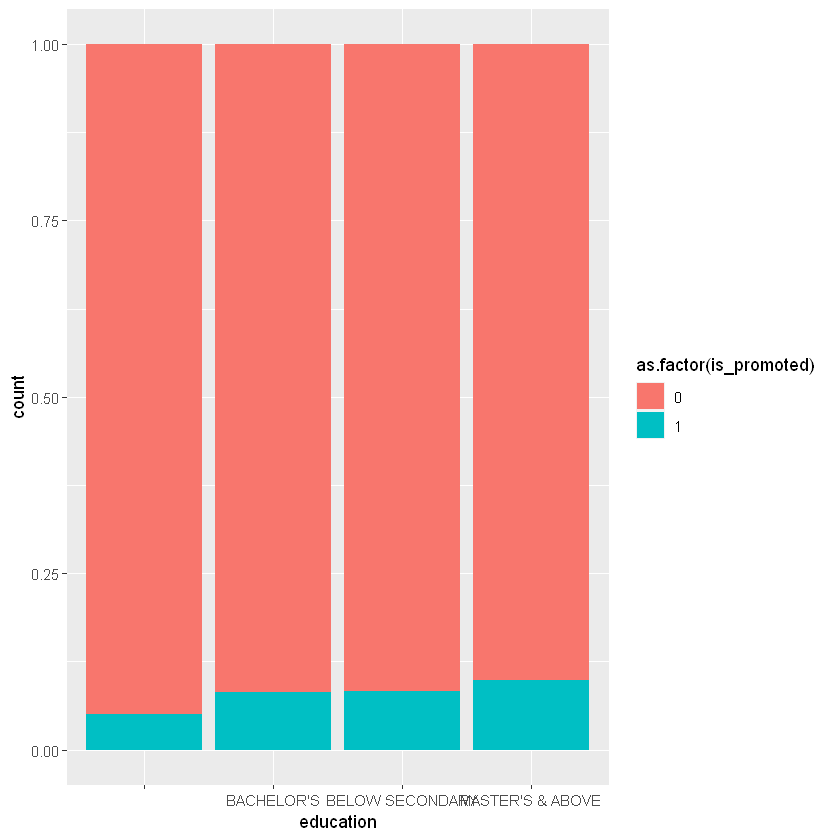

In [11]:
# Understanding the  Blanks in education
table(master$education)

require(ggplot2)
ggplot(master[1:54808,], aes(x = education, fill = as.factor(is_promoted))) +
  geom_bar(position = 'fill')

In [12]:
# After looking at the data , came to the assumption that 3443 rows are missing because
# These are the employee which either didn't go to school or maybe 10th
# So for now keeping it simple , I gave it a new category name PRIMARY
master$education[which(master$education == "")] <- "PRIMARY"
table(master$education)


      BACHELOR'S  BELOW SECONDARY MASTER'S & ABOVE          PRIMARY 
           52247             1179            21429             3443 

In [13]:
# Checking the Na/missing values
# Check missing values
colSums(is.na(master))

employee_id           department               region 
                   0                    0                    0 
           education               gender  recruitment_channel 
                   0                    0                    0 
     no_of_trainings                  age previous_year_rating 
                   0                    0                 5936 
   length_of_service        KPIs_met..80.          awards_won. 
                   0                    0                    0 
  avg_training_score          is_promoted 
                   0                23490

In [14]:
# 5936 values are missing in previous_year_rating
# Understanding the column and finding the reason
summary(master$previous_year_rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   3.000   3.332   4.000   5.000    5936 

In [15]:
# Check where previous_year_rating is NA
df = master[which(is.na(master$previous_year_rating)), ]
table(df$length_of_service)


   1 
5936 

In [16]:
# Found out that employees don't have previous_year_rating because, their length of service in the company iss not more than 1 year
# so right now , making a new category for na values i.e. NEW_JOINEE
master$previous_year_rating[which(is.na(
  master$previous_year_rating))] <- "NEW_JOINEE"

In [17]:
# Check duplicates
sum(duplicated(master[,-1]))

[1] 144

In [18]:
# 144 duplicate rows.

(144/nrow(master)) * 100
# Negligible duplicacy. Keeping it as it is.

[1] 0.1839127

## Step 3 - Exploratory data analysis

In [19]:
# Check no. of levels for each columns
sapply(master, n_distinct)


employee_id           department               region 
               78298                    9                   34 
           education               gender  recruitment_channel 
                   4                    2                    3 
     no_of_trainings                  age previous_year_rating 
                  10                   41                    6 
   length_of_service        KPIs_met..80.          awards_won. 
                  35                    2                    2 
  avg_training_score          is_promoted 
                  61                    3

In [20]:
# See the structure
str(master)


'data.frame':	78298 obs. of  14 variables:
 $ employee_id         : int  65438 65141 7513 2542 48945 58896 20379 16290 73202 28911 ...
 $ department          : chr  "SALES & MARKETING" "OPERATIONS" "SALES & MARKETING" "SALES & MARKETING" ...
 $ region              : chr  "REGION_7" "REGION_22" "REGION_19" "REGION_23" ...
 $ education           : chr  "MASTER'S & ABOVE" "BACHELOR'S" "BACHELOR'S" "BACHELOR'S" ...
 $ gender              : chr  "F" "M" "M" "M" ...
 $ recruitment_channel : chr  "SOURCING" "OTHER" "SOURCING" "OTHER" ...
 $ no_of_trainings     : int  1 1 1 2 1 2 1 1 1 1 ...
 $ age                 : int  35 30 34 39 45 31 31 33 28 32 ...
 $ previous_year_rating: chr  "5" "5" "3" "1" ...
 $ length_of_service   : int  8 4 7 10 2 7 5 6 5 5 ...
 $ KPIs_met..80.       : int  1 0 0 0 0 0 0 0 0 1 ...
 $ awards_won.         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : int  49 60 50 50 73 85 59 63 83 54 ...
 $ is_promoted         : int  0 0 0 0 0 0 0 0 0 0 ...


####  Univariate / Bivariate Analysis ----

In [21]:
# 1 column- employee_id
n_distinct(master$employee_id) == nrow(master)

[1] TRUE

In [22]:
# 2 department
group_by(master, department) %>%
  summarise(prom_perc = sum(is_promoted, na.rm = T)/n()*100) %>%
  arrange(prom_perc)

# There seems departmental bias.

department,prom_perc
LEGAL,3.571429
HR,3.882387
R&D,4.794997
SALES & MARKETING,5.021735
FINANCE,5.679625
OPERATIONS,6.349305
ANALYTICS,6.674488
PROCUREMENT,6.772987
TECHNOLOGY,7.567248


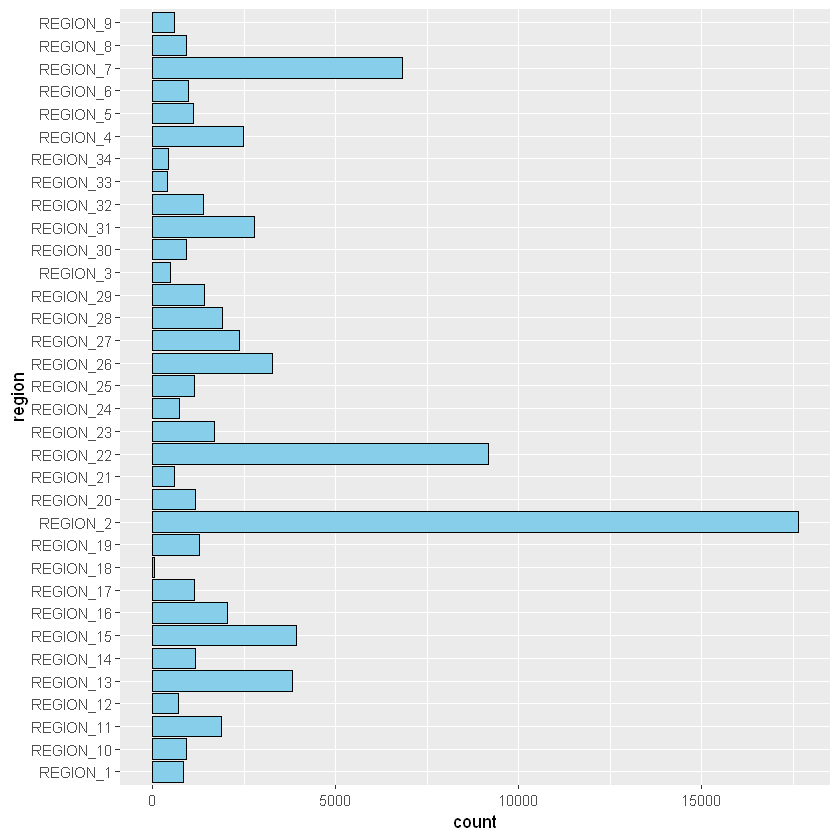

In [23]:
# 3 region
# Way too many categories in region. Pattern detection not possible.
require(ggplot2)
ggplot(master, aes(x = region)) +
  geom_bar(fill = 'skyblue',color = 'black') + coord_flip()

In [24]:
group_by(master, region) %>%
  summarise(count_perc = n()/nrow(master) * 100) %>%
  arrange(count_perc)

# There seems regional bias.

region,count_perc
REGION_18,0.06513576
REGION_33,0.50448287
REGION_34,0.57089581
REGION_3,0.62964571
REGION_21,0.75353138
REGION_9,0.76630310
REGION_12,0.91317786
REGION_24,0.92850392
REGION_1,1.08304171
REGION_10,1.17116657


In [25]:
# 4 education


group_by(master, education) %>%
  summarise(prom_perc = sum(is_promoted, na.rm = T)/n()*100) %>%
  arrange(desc(prom_perc))

# Slightly higher fraction of promotions in Masters and Above category.
# Education matters !!!

education,prom_perc
MASTER'S & ABOVE,6.864529
BACHELOR'S,5.757268
BELOW SECONDARY,5.682782
PRIMARY,3.543421


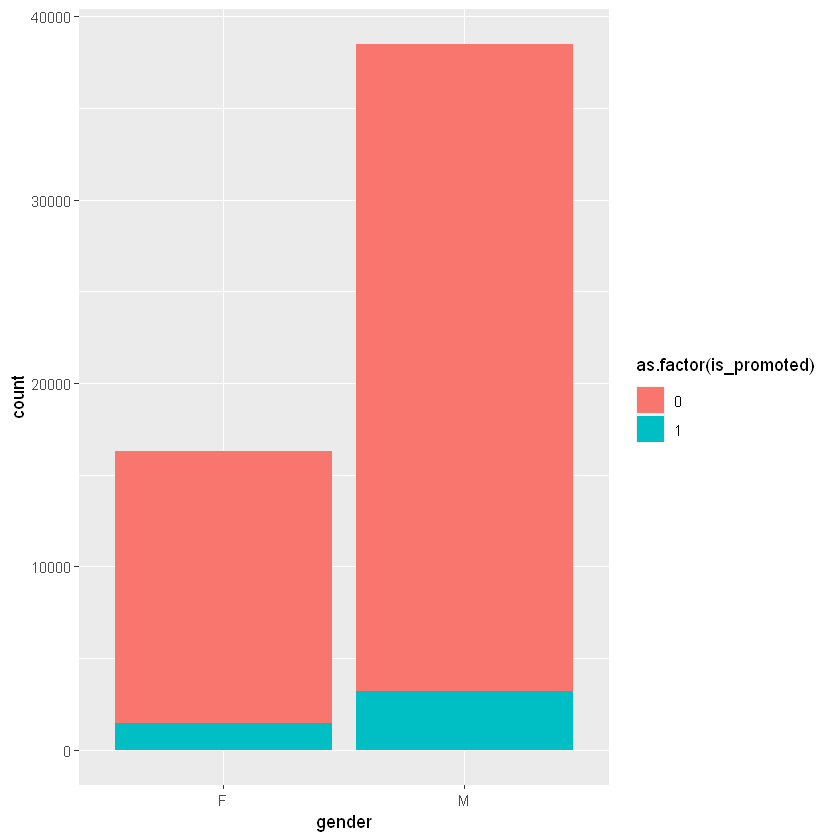

In [26]:
# 5 gender

ggplot(master[!is.na(master$is_promoted),],
       aes(x = gender, fill =  as.factor(is_promoted))) +
  geom_bar()



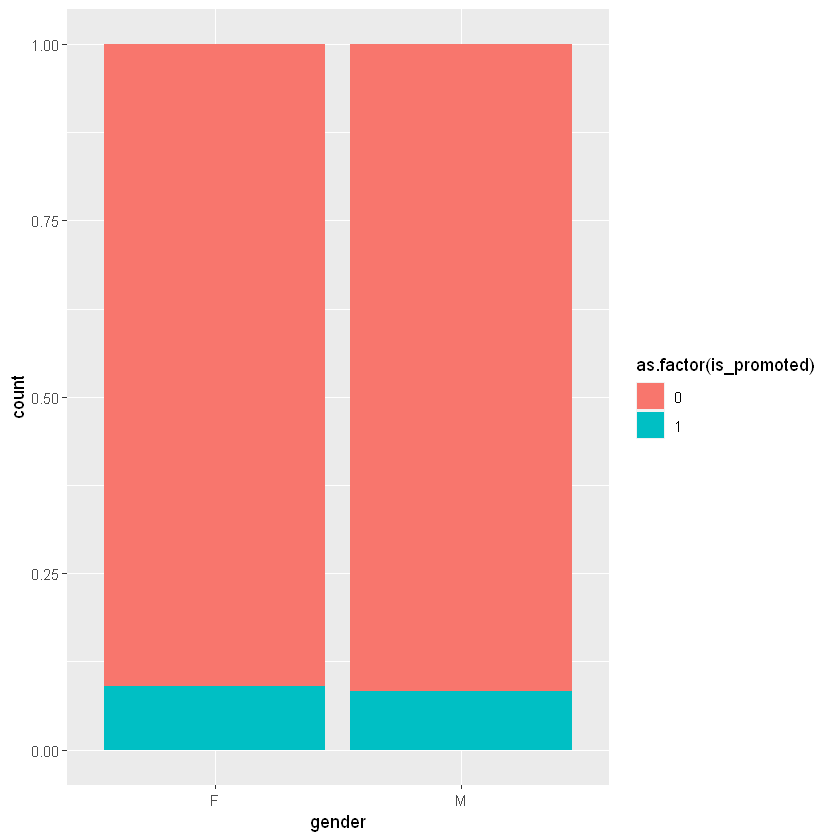

In [27]:
ggplot(master[!is.na(master$is_promoted),],
       aes(x = gender, fill =  as.factor(is_promoted))) +
  geom_bar(position = 'fill')

# Lesser female employees overall. But no apparent gender bias in promotions.

In [28]:
# 6 recruitment_channel

group_by(master, recruitment_channel) %>%
  summarise(prom_perc = sum(is_promoted, na.rm = T)/n()*100) %>%
  arrange(prom_perc)

recruitment_channel,prom_perc
OTHER,5.872622
SOURCING,5.949188
REFERRED,8.662900


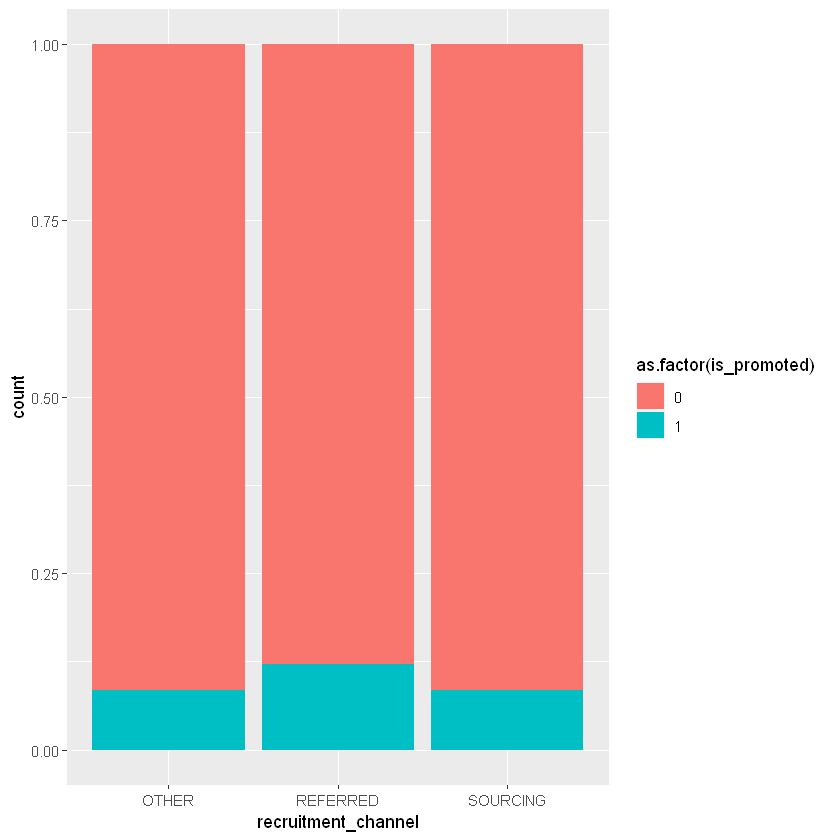

In [29]:
ggplot(master[!is.na(master$is_promoted),],
       aes(x =recruitment_channel , fill =  as.factor(is_promoted))) +
  geom_bar(position = 'fill')

# Clearly, referred employees outperform others.

0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
 96%  97%  98%  99% 100% 
   3    3    3    4   10

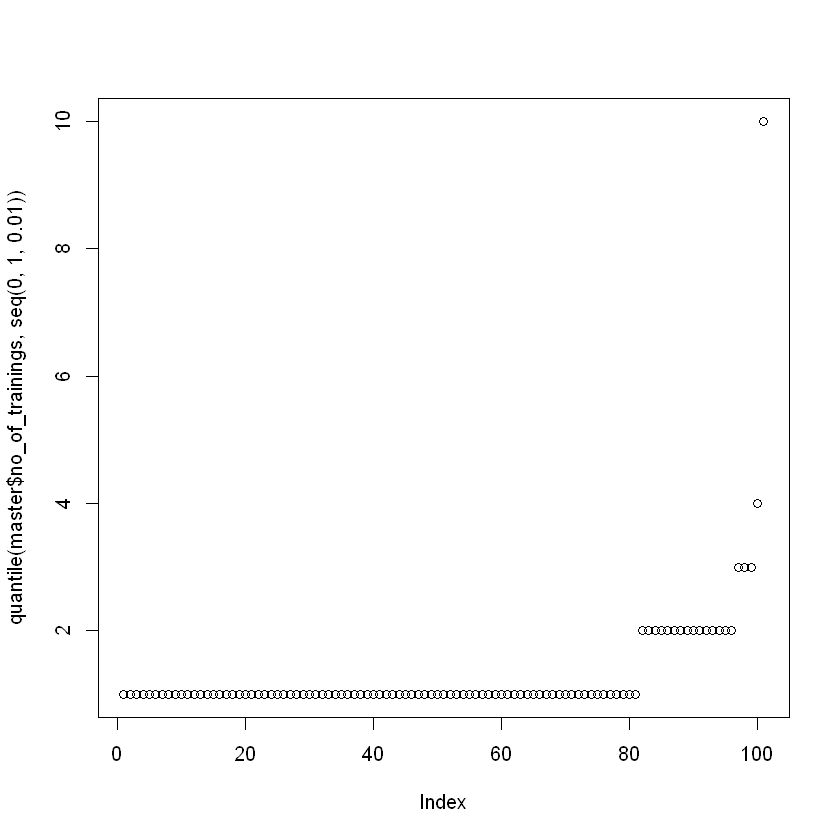

In [30]:
# 7 no_of_trainings

# Check outliers

plot(quantile(master$no_of_trainings, seq(0,1,0.01)))
quantile(master$no_of_trainings, seq(0,1,0.01))

In [31]:
# Fixing the ouliers (roofing)
master$no_of_trainings[master$no_of_trainings > 4] <- 4

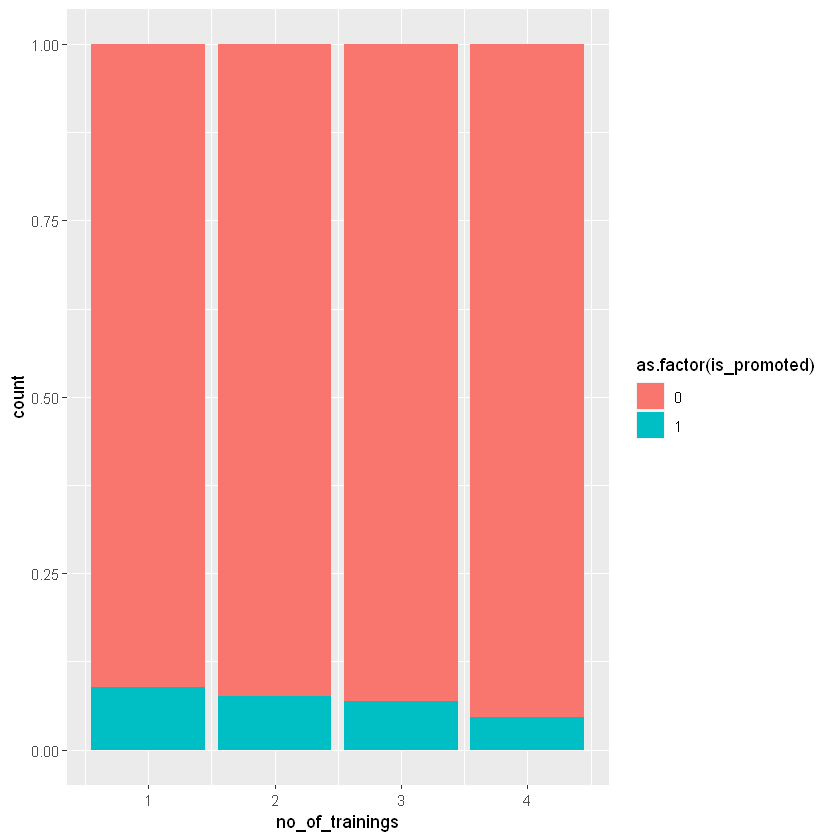

In [32]:
# Analysing the no_of_trainings
ggplot(master[!is.na(master$is_promoted),], aes(x = no_of_trainings, fill = as.factor(is_promoted))) +
  geom_bar(position = 'fill')

In [33]:
group_by(master, no_of_trainings) %>%
  summarise(prom_perc = sum(is_promoted, na.rm = T)/n()*100) %>%
  arrange(prom_perc)

no_of_trainings,prom_perc
4,3.333333
3,4.820229
2,5.246726
1,6.176350


In [34]:
# More the no of trainings required, lesser the chance of propmotion.

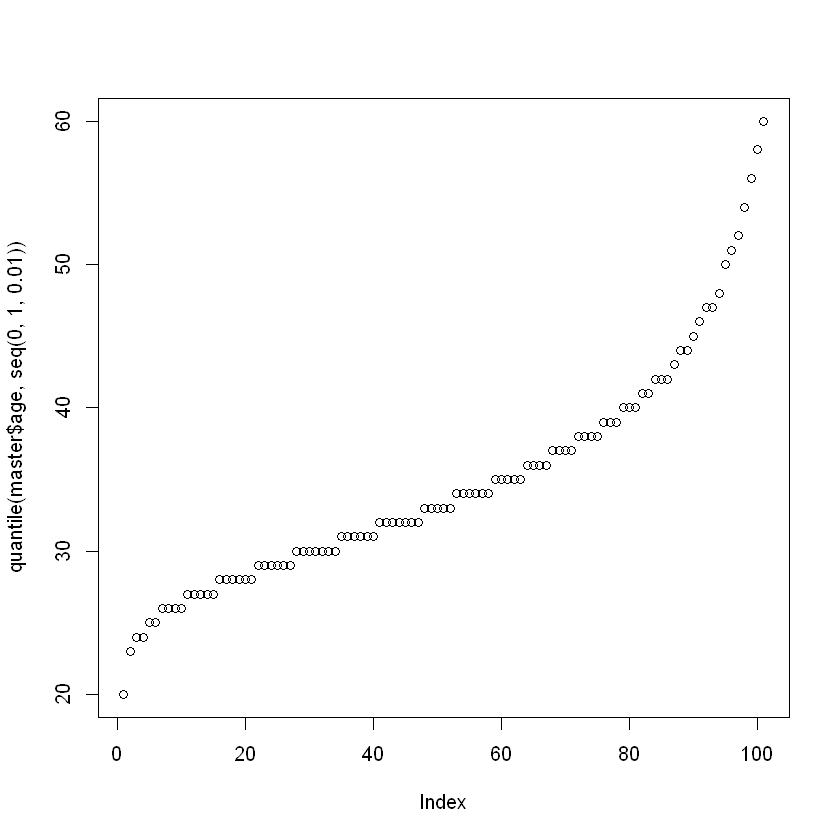

In [35]:
# 8 Age

# Check outliers
plot(quantile(master$age, seq(0,1,0.01)))

# No outliers

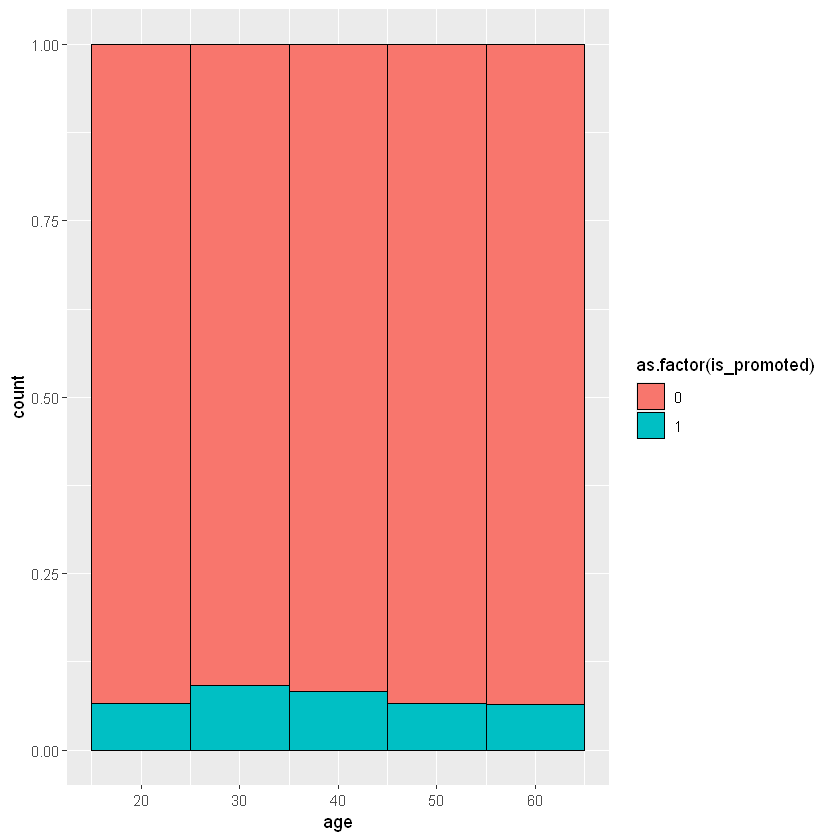

In [36]:
ggplot(train, aes(x = age, fill = as.factor(is_promoted))) +
  geom_histogram(binwidth = 10, color = 'black', position = 'fill')

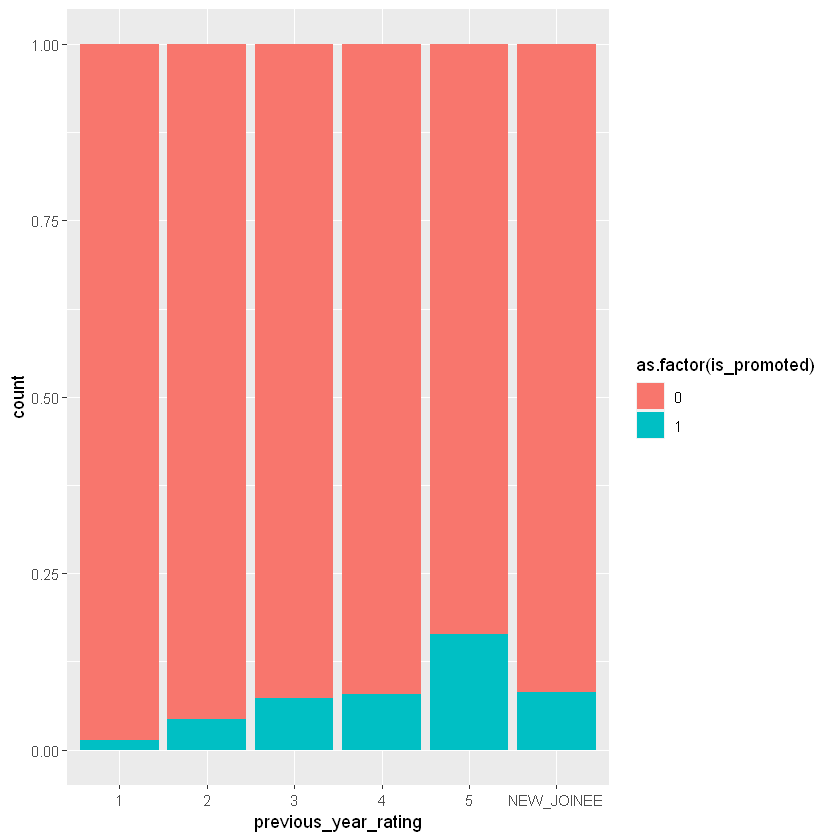

In [37]:

# 9 previous_year_rating
ggplot(master[!is.na(master$is_promoted),], aes(x = previous_year_rating, fill = as.factor(is_promoted))) +
  geom_bar(position = 'fill')



# Better the rating, higher the probability of promotion.

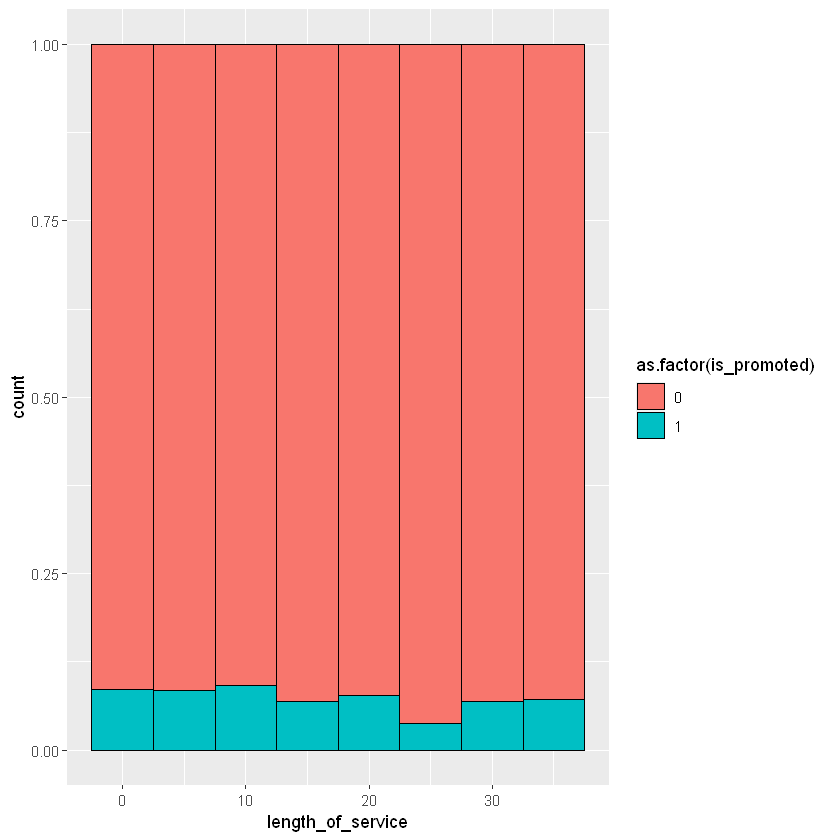

In [38]:
# 10 length_of_service
ggplot(master[!is.na(master$is_promoted),],
       aes(x = length_of_service,
           fill = as.factor(is_promoted))) +
  geom_histogram(binwidth = 5, position = 'fill',color = 'black')

0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    1    1    1    2    2    2    2    2    2    2 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   2    2    2    2    2    3    3    3    3    3    3    3    3    3    3    3 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   3    3    4    4    4    4    4    4    4    4    4    4    4    4    5    5 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   5    5    5    5    5    5    5    5    5    6    6    6    6    6    6    6 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   6    6    7    7    7    7    7    7    7    7    7    7    8    8    8    8 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   8    9    9    9    9    9   10   10   10   10   11   12   12   13   14   15 
 96%  97%  98%  99% 100% 
  16   17   18   20   37

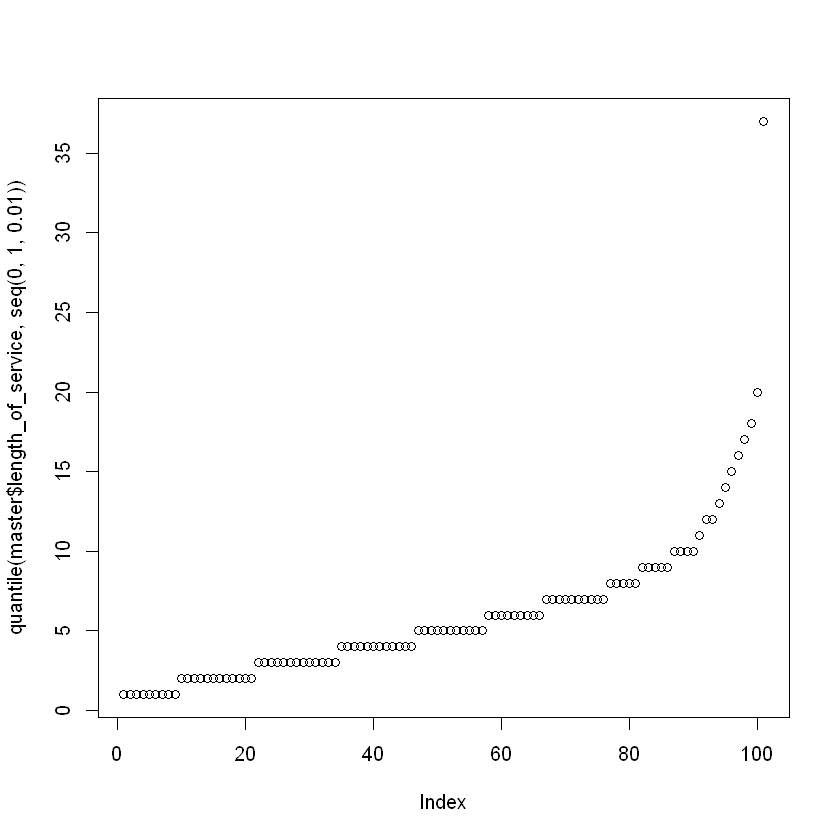

In [39]:
# Check outliers
plot(quantile(master$length_of_service, seq(0,1,0.01)))
quantile(master$length_of_service, seq(0,1,0.01))

master$length_of_service[master$length_of_service > 20] <- 20

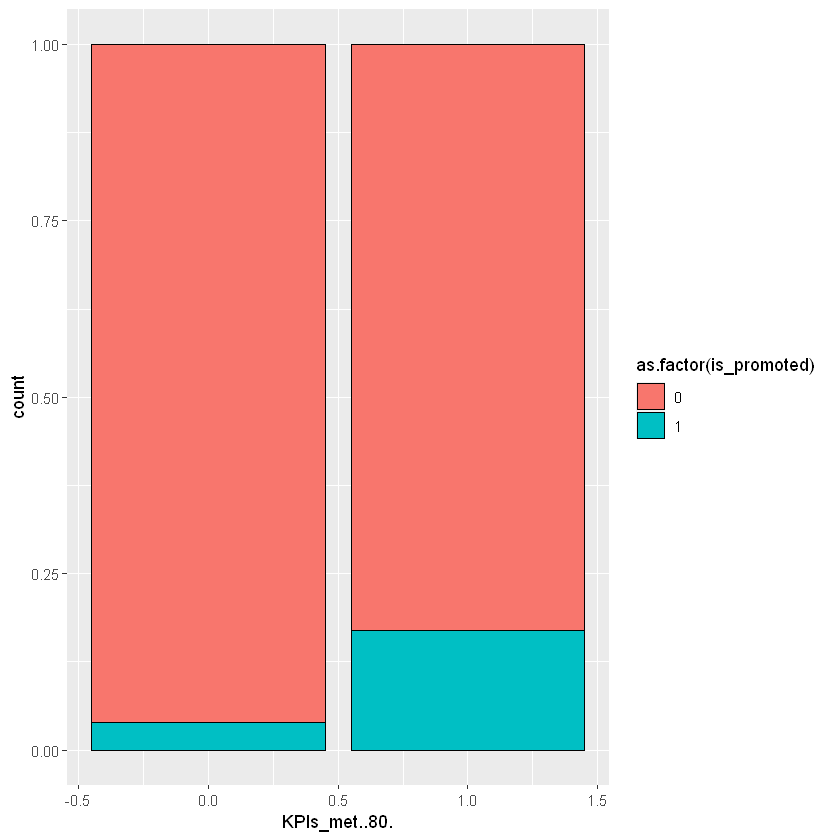

In [40]:
# 11 KPIs_met>80%

ggplot(master[!is.na(master$is_promoted),],
       aes(x = KPIs_met..80., fill = as.factor(is_promoted))) +
  geom_bar(position = 'fill',color = 'black')

# Clearly, meeting KPI matters for promotion

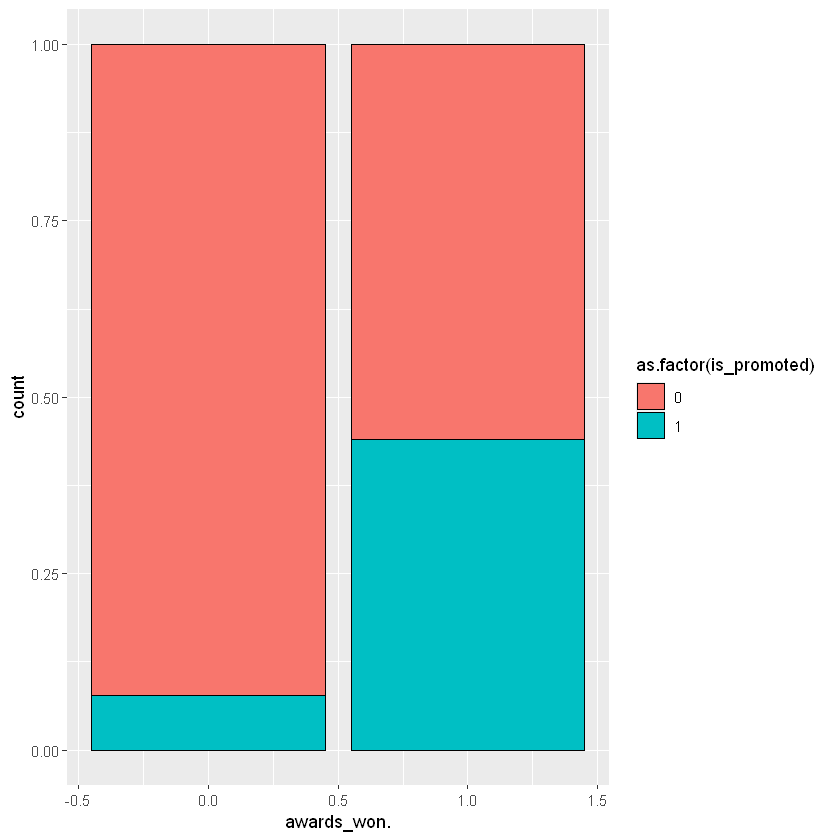

In [41]:

# 12 awards_won?

ggplot(master[!is.na(master$is_promoted),],
       aes(x = awards_won., fill = as.factor(is_promoted))) +
  geom_bar(position = 'fill',color = 'black')

# It highly impacts chances of promotion, but Very few employees won award

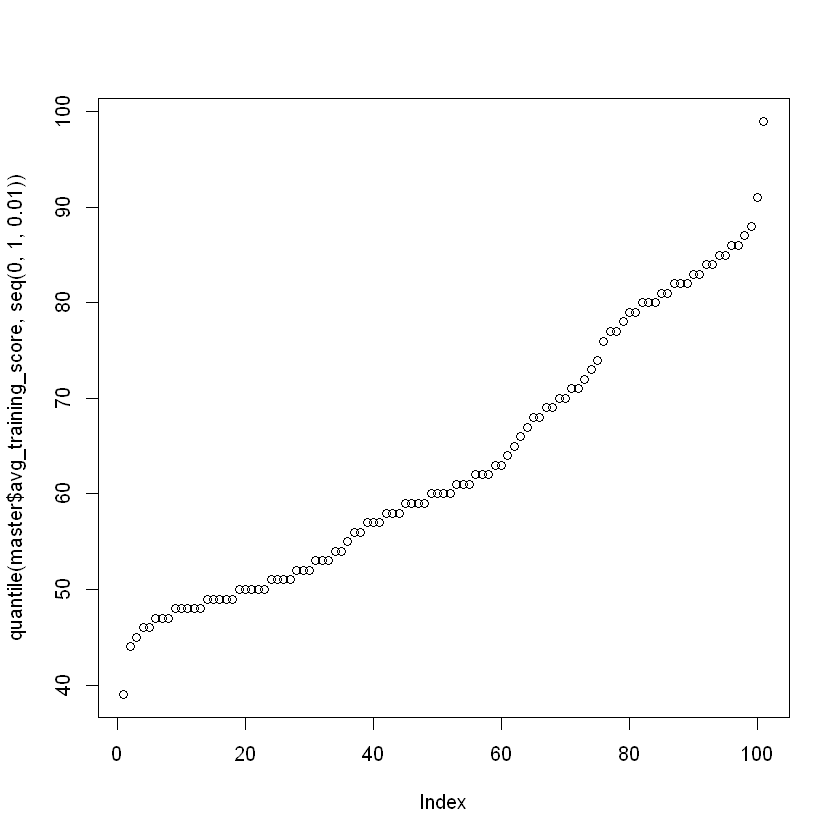

In [42]:
# 13 avg_training_score
plot(quantile(master$avg_training_score, seq(0,1,0.01)))

# No outliers as such

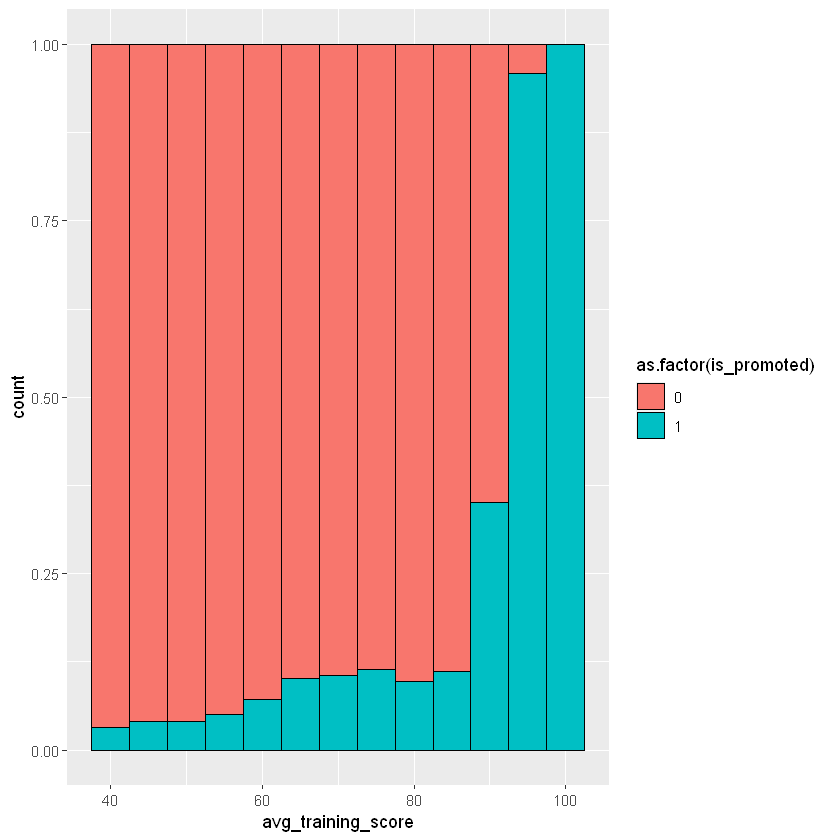

In [43]:
ggplot(master[!is.na(master$is_promoted),],
       aes(x = avg_training_score, fill = as.factor(is_promoted))) +
  geom_histogram(binwidth = 5, position = 'fill',color = 'black')
# it is highly impactful

####     scaling continuous variables.

In [44]:
colnames(master)
table(master$no_of_trainings)

[1] "employee_id"          "department"           "region"              
 [4] "education"            "gender"               "recruitment_channel" 
 [7] "no_of_trainings"      "age"                  "previous_year_rating"
[10] "length_of_service"    "KPIs_met..80."        "awards_won."         
[13] "avg_training_score"   "is_promoted"


    1     2     3     4 
63306 11531  2531   930 

In [45]:
cont_vars <- master[ ,c("no_of_trainings","age","length_of_service","avg_training_score")] # all continous variables


master[ ,c("no_of_trainings","age","length_of_service","avg_training_score")] <- as.data.frame(sapply(master[ ,c("no_of_trainings","age","length_of_service","avg_training_score")], scale))


In [46]:
# Dropping already manipulated variables, as we saw it is highly biased
master$region <- NULL

In [47]:
# Removing employee_id, as it doesn't affect promotion
master$employee_id <- NULL

In [48]:
# At last checking the data
str(master)

'data.frame':	78298 obs. of  12 variables:
 $ department          : chr  "SALES & MARKETING" "OPERATIONS" "SALES & MARKETING" "SALES & MARKETING" ...
 $ education           : chr  "MASTER'S & ABOVE" "BACHELOR'S" "BACHELOR'S" "BACHELOR'S" ...
 $ gender              : chr  "F" "M" "M" "M" ...
 $ recruitment_channel : chr  "SOURCING" "OTHER" "SOURCING" "OTHER" ...
 $ no_of_trainings     : num  -0.436 -0.436 -0.436 1.326 -0.436 ...
 $ age                 : num  0.0264 -0.6258 -0.104 0.5482 1.3309 ...
 $ previous_year_rating: chr  "5" "5" "3" "1" ...
 $ length_of_service   : num  0.541 -0.445 0.295 1.035 -0.938 ...
 $ KPIs_met..80.       : int  1 0 0 0 0 0 0 0 0 1 ...
 $ awards_won.         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg_training_score  : num  -1.072 -0.25 -0.997 -0.997 0.721 ...
 $ is_promoted         : int  0 0 0 0 0 0 0 0 0 0 ...


##### # All variables have proper data type.

##### EDA Complete...

## Step 4- Model Building

In [49]:
# Separating the data for train and test(submission in hackathon)

train <- master[which(!is.na(master$is_promoted)),]

test <- master[which(is.na(master$is_promoted)),]

In [50]:
require(caTools)

Loading required package: caTools
Warning message:
"package 'caTools' was built under R version 3.6.3"

In [51]:
# separating the data for model training and model validation
set.seed(999)
index = sample.split(train$is_promoted, SplitRatio = 0.75)

In [52]:
tr.data <- train[index, ]
val.data <- train[!index, ]

In [53]:
# Create dummy variables.
require(dummies)

Loading required package: dummies
dummies-1.5.6 provided by Decision Patterns



In [54]:
tr.dum <- dummy.data.frame(tr.data)
val.dum <- dummy.data.frame(val.data)
test.dum <- dummy.data.frame(test)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

In [55]:
tr.dum

,departmentANALYTICS,departmentFINANCE,departmentHR,departmentLEGAL,departmentOPERATIONS,departmentPROCUREMENT,departmentR&D,departmentSALES & MARKETING,departmentTECHNOLOGY,educationBACHELOR'S,...,previous_year_rating2,previous_year_rating3,previous_year_rating4,previous_year_rating5,previous_year_ratingNEW_JOINEE,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.54144005,1,0,-1.07217757,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,-0.44475174,0,0,-0.25028006,0
3,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0.29489210,0,0,-0.99745962,0
6,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.29489210,0,0,1.61766885,0
7,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,-0.19820379,0,0,-0.32499801,0
8,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.04834415,0,0,-0.02612619,0
9,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-0.19820379,0,0,1.46823293,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,-0.19820379,1,0,-0.69858779,0
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,-1.18439558,0,0,1.01992520,0
12,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,-0.69129969,1,0,-0.99745962,1


---

### Model Training

----

#### Logistic Regression ----

In [93]:
model_1 <- glm(is_promoted ~ ., data = tr.dum, family = 'binomial')
summary(model_1)
#AIC- 16216


Call:
glm(formula = is_promoted ~ ., family = "binomial", data = tr.dum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8019  -0.3607  -0.2016  -0.1192   3.4484  

Coefficients: (5 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -9.04263    0.20368 -44.396  < 2e-16 ***
departmentANALYTICS            -1.75976    0.08640 -20.367  < 2e-16 ***
departmentFINANCE               5.32073    0.16131  32.984  < 2e-16 ***
departmentHR                    8.23029    0.21793  37.766  < 2e-16 ***
departmentLEGAL                 5.30873    0.22478  23.618  < 2e-16 ***
departmentOPERATIONS            5.48315    0.13368  41.016  < 2e-16 ***
departmentPROCUREMENT           2.67579    0.09557  27.997  < 2e-16 ***
`departmentR&D`                -2.17749    0.16641 -13.085  < 2e-16 ***
`departmentSALES & MARKETING`   8.75112    0.18746  46.682  < 2e-16 ***
departmentTECHNOLOGY                

##### Model improvemen

In [57]:
# Step-wise reduction
model_2 <- step(model_1, direction = 'both')

Start:  AIC=16217.46
is_promoted ~ departmentANALYTICS + departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + departmentTECHNOLOGY + 
    `educationBACHELOR'S` + `educationBELOW SECONDARY` + `educationMASTER'S & ABOVE` + 
    educationPRIMARY + genderF + genderM + recruitment_channelOTHER + 
    recruitment_channelREFERRED + recruitment_channelSOURCING + 
    no_of_trainings + age + previous_year_rating1 + previous_year_rating2 + 
    previous_year_rating3 + previous_year_rating4 + previous_year_rating5 + 
    previous_year_ratingNEW_JOINEE + length_of_service + KPIs_met..80. + 
    awards_won. + avg_training_score


Step:  AIC=16217.46
is_promoted ~ departmentANALYTICS + departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + departmentTECHNOLOGY + 
    `educationBACHELOR'S` + 

In [58]:
# Checking summary after step reduction
summary(model_2)


Call:
glm(formula = is_promoted ~ departmentANALYTICS + departmentFINANCE + 
    departmentHR + departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + `educationBACHELOR'S` + 
    `educationMASTER'S & ABOVE` + no_of_trainings + age + previous_year_rating1 + 
    previous_year_rating2 + previous_year_rating4 + previous_year_rating5 + 
    length_of_service + KPIs_met..80. + awards_won. + avg_training_score, 
    family = "binomial", data = tr.dum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8084  -0.3607  -0.2020  -0.1192   3.4427  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -8.96315    0.16995 -52.741  < 2e-16 ***
departmentANALYTICS           -1.75721    0.08466 -20.757  < 2e-16 ***
departmentFINANCE              5.32493    0.16110  33.053  < 2e-16 ***
departmentHR                   8.22997    0.21789  37.772  < 2e-16 ***

In [59]:
# Copying the command from step reduction
model_2 <- glm(formula = is_promoted ~ departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + departmentTECHNOLOGY + 
    `educationBACHELOR'S` + `educationMASTER'S & ABOVE` + no_of_trainings + 
    age + previous_year_rating1 + previous_year_rating2 + previous_year_rating4 + 
    previous_year_rating5 + length_of_service + KPIs_met..80. + 
    awards_won. + avg_training_score, family = "binomial", data = tr.dum)

In [60]:
require(car)

Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



##### Removing multicolinerity and also keeping the accuracy
* It is done through hit and try method with different models

In [61]:
sort(vif(model_2))

awards_won.               no_of_trainings 
                     1.014742                      1.026391 
        previous_year_rating1         previous_year_rating2 
                     1.040723                      1.078052 
              `departmentR&D`         previous_year_rating4 
                     1.139705                      1.233375 
                KPIs_met..80.         previous_year_rating5 
                     1.250033                      1.348574 
              departmentLEGAL             length_of_service 
                     1.720274                      1.763275 
                          age          departmentTECHNOLOGY 
                     1.955183                      2.243226 
            departmentFINANCE         departmentPROCUREMENT 
                     3.099897                      3.828208 
                 departmentHR         `educationBACHELOR'S` 
                     4.024542                      5.904375 
  `educationMASTER'S & ABOVE`          departmentOPERATIONS 
                     6.389778                     10.001093 
           avg_training_score `departmentSALES & MARKETING` 
                    13.646775                     19.719026

In [62]:
model_3 <- glm(formula = is_promoted ~ departmentFINANCE + departmentHR + 
                 departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
               `departmentR&D` + departmentTECHNOLOGY + 
               `educationBACHELOR'S` + `educationMASTER'S & ABOVE` + no_of_trainings + 
               age + previous_year_rating1 + previous_year_rating2 + previous_year_rating4 + 
                previous_year_rating5 + length_of_service + KPIs_met..80. + 
                  awards_won. + avg_training_score, family = "binomial", data = tr.dum)
sort(vif(model_3))
summary(model_3)   
# AIC now-19674

awards_won.             no_of_trainings 
                   1.015033                    1.024892 
            departmentLEGAL       previous_year_rating1 
                   1.036758                    1.039868 
            `departmentR&D`       previous_year_rating2 
                   1.064310                    1.072944 
              KPIs_met..80.           departmentFINANCE 
                   1.115157                    1.117790 
               departmentHR       departmentPROCUREMENT 
                   1.153800                    1.237460 
      previous_year_rating4        departmentTECHNOLOGY 
                   1.237568                    1.330565 
      previous_year_rating5        departmentOPERATIONS 
                   1.372240                    1.449158 
         avg_training_score           length_of_service 
                   1.452578                    1.772777 
                        age       `educationBACHELOR'S` 
                   1.968610                    6.029471 
`educationMASTER'S & ABOVE` 
                   6.508510


Call:
glm(formula = is_promoted ~ departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + departmentTECHNOLOGY + `educationBACHELOR'S` + 
    `educationMASTER'S & ABOVE` + no_of_trainings + age + previous_year_rating1 + 
    previous_year_rating2 + previous_year_rating4 + previous_year_rating5 + 
    length_of_service + KPIs_met..80. + awards_won. + avg_training_score, 
    family = "binomial", data = tr.dum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9605  -0.4386  -0.2693  -0.1803   3.1445  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -3.572774   0.103493 -34.522  < 2e-16 ***
departmentFINANCE            0.006892   0.097915   0.070  0.94388    
departmentHR                 0.184883   0.119371   1.549  0.12143    
departmentLEGAL             -0.220740   0.174081  -1.268  0.20479    
departmentOPERATIONS         0.0994

In [63]:
# heavy drop in Aic , so now removing educationBACHELOR'S
model_4 <- glm(formula = is_promoted ~ departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + departmentTECHNOLOGY + 
    `educationMASTER'S & ABOVE` + no_of_trainings + 
    age + previous_year_rating1 + previous_year_rating2 + previous_year_rating4 + 
    previous_year_rating5 + length_of_service + KPIs_met..80. + 
    awards_won. + avg_training_score, family = "binomial", data = tr.dum)

In [64]:
sort(vif(model_4))
summary(model_4) 

awards_won.               no_of_trainings 
                     1.014742                      1.025910 
        previous_year_rating1         previous_year_rating2 
                     1.040724                      1.077561 
              `departmentR&D`   `educationMASTER'S & ABOVE` 
                     1.139587                      1.209598 
        previous_year_rating4                 KPIs_met..80. 
                     1.233012                      1.250433 
        previous_year_rating5               departmentLEGAL 
                     1.348440                      1.720115 
            length_of_service                           age 
                     1.771696                      1.939344 
         departmentTECHNOLOGY             departmentFINANCE 
                     2.242069                      3.101280 
        departmentPROCUREMENT                  departmentHR 
                     3.828752                      4.020498 
         departmentOPERATIONS            avg_training_score 
                    10.008356                     13.653007 
`departmentSALES & MARKETING` 
                    19.728621


Call:
glm(formula = is_promoted ~ departmentFINANCE + departmentHR + 
    departmentLEGAL + departmentOPERATIONS + departmentPROCUREMENT + 
    `departmentR&D` + `departmentSALES & MARKETING` + departmentTECHNOLOGY + 
    `educationMASTER'S & ABOVE` + no_of_trainings + age + previous_year_rating1 + 
    previous_year_rating2 + previous_year_rating4 + previous_year_rating5 + 
    length_of_service + KPIs_met..80. + awards_won. + avg_training_score, 
    family = "binomial", data = tr.dum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7878  -0.3615  -0.2027  -0.1194   3.4515  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -10.36494    0.16445 -63.029  < 2e-16 ***
departmentFINANCE               7.09013    0.18412  38.508  < 2e-16 ***
departmentHR                    9.98880    0.24296  41.113  < 2e-16 ***
departmentLEGAL                 7.07632    0.24208  29.232  < 2e-16 ***
departmentOPERATI

In [65]:
#  Aic improved , but still colinerity


model_5<- glm(is_promoted ~ + departmentFINANCE + departmentHR + 
                 departmentLEGAL +  `departmentSALES & MARKETING` +
                 `departmentR&D` + `educationBACHELOR'S` + 
                  no_of_trainings + age + previous_year_rating1 + 
                 previous_year_rating2 + previous_year_rating4 + previous_year_rating5 + 
                 length_of_service + KPIs_met..80. + awards_won. + avg_training_score, 
               data = tr.dum, family = 'binomial')
sort(vif(model_5))
summary(model_5)
# now colinerity gone ,but Aic increased , but will cope with that

awards_won.               no_of_trainings 
                     1.013488                      1.024148 
              `departmentR&D`         previous_year_rating1 
                     1.031757                      1.041016 
              departmentLEGAL         previous_year_rating2 
                     1.054595                      1.073176 
        `educationBACHELOR'S`                 KPIs_met..80. 
                     1.086271                      1.123355 
            departmentFINANCE         previous_year_rating4 
                     1.175905                      1.234125 
                 departmentHR         previous_year_rating5 
                     1.286232                      1.352343 
            length_of_service                           age 
                     1.810918                      1.865366 
`departmentSALES & MARKETING`            avg_training_score 
                     2.766455                      2.909374


Call:
glm(formula = is_promoted ~ +departmentFINANCE + departmentHR + 
    departmentLEGAL + `departmentSALES & MARKETING` + `departmentR&D` + 
    `educationBACHELOR'S` + no_of_trainings + age + previous_year_rating1 + 
    previous_year_rating2 + previous_year_rating4 + previous_year_rating5 + 
    length_of_service + KPIs_met..80. + awards_won. + avg_training_score, 
    family = "binomial", data = tr.dum)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9009  -0.4070  -0.2590  -0.1665   3.1026  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -4.03947    0.06107 -66.144  < 2e-16 ***
departmentFINANCE              0.87333    0.10214   8.550  < 2e-16 ***
departmentHR                   1.39998    0.12835  10.908  < 2e-16 ***
departmentLEGAL                0.63924    0.17860   3.579 0.000345 ***
`departmentSALES & MARKETING`  1.95519    0.07349  26.606  < 2e-16 ***
`departmentR&D`               -

## Step 5- Model Validation

In [66]:
### Prediction on test values
val.dum$prob_promoted <- predict(model_5, newdata = val.dum, type = 'response')

In [77]:
val.dum$pred_promoted <- ifelse(val.dum$prob_promoted >= 0.08, 1, 0)

act_prom <- as.factor(val.dum$is_promoted)
pred_prom <- as.factor(val.dum$pred_promoted)

In [71]:
require(caret)

In [78]:
confusionMatrix(pred_prom, act_prom, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9129  288
         1 3406  879
                                          
               Accuracy : 0.7304          
                 95% CI : (0.7229, 0.7378)
    No Information Rate : 0.9148          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2177          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.75321         
            Specificity : 0.72828         
         Pos Pred Value : 0.20513         
         Neg Pred Value : 0.96942         
             Prevalence : 0.08517         
         Detection Rate : 0.06415         
   Detection Prevalence : 0.31273         
      Balanced Accuracy : 0.74075         
                                          
       'Positive' Class : 1               
                        

* Finding threshold value where sensitity, specificity and accuracy are equal

****

## Model 2 - Random Forest

In [79]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [91]:
tr.dum

,departmentANALYTICS,departmentFINANCE,departmentHR,departmentLEGAL,departmentOPERATIONS,departmentPROCUREMENT,departmentR&D,departmentSALES & MARKETING,departmentTECHNOLOGY,educationBACHELOR'S,...,previous_year_rating2,previous_year_rating3,previous_year_rating4,previous_year_rating5,previous_year_ratingNEW_JOINEE,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.54144005,1,0,-1.07217757,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,-0.44475174,0,0,-0.25028006,0
3,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0.29489210,0,0,-0.99745962,0
6,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.29489210,0,0,1.61766885,0
7,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,-0.19820379,0,0,-0.32499801,0
8,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.04834415,0,0,-0.02612619,0
9,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-0.19820379,0,0,1.46823293,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,-0.19820379,1,0,-0.69858779,0
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,-1.18439558,0,0,1.01992520,0
12,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,-0.69129969,1,0,-0.99745962,1


In [96]:
tr.sh <- dummy.data.frame(tr.data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

In [97]:
model_r <- randomForest(is_promoted ~ . ,data=tr.sh, family = 'binomial')

ERROR: Error in eval(predvars, data, env): object 'departmentR&D' not found
